In [1]:
import numpy as np
import matplotlib.pyplot as plt

* Create a 3D grid in configuration space with uniform density.

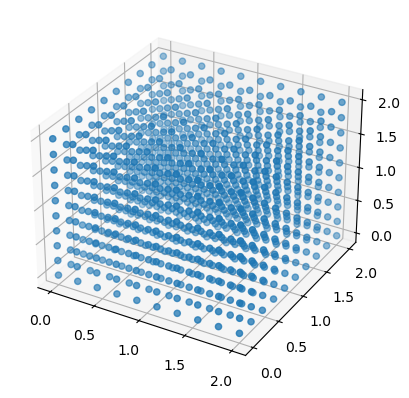

In [2]:
#Create the 3D grid:
N=10
X = np.linspace(0,2,N)
Y = np.linspace(0,2,N)
Z = np.linspace(0,2,N)
x,y,z = np.meshgrid(X,Y,Z)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
#to view "a fette":
#image = np.random.rand(10, 10)
#plt.imshow(image, cmap='gray')  # cmap='gray' sets the colormap to grayscale
#plt.colorbar()  # Display a color bar to indicate pixel values

# Display plot
plt.show()

* Compute fast fourier trasform


[[[1.00000000e+03+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j]
  [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j]
  [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j]
  [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j]
  [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.000

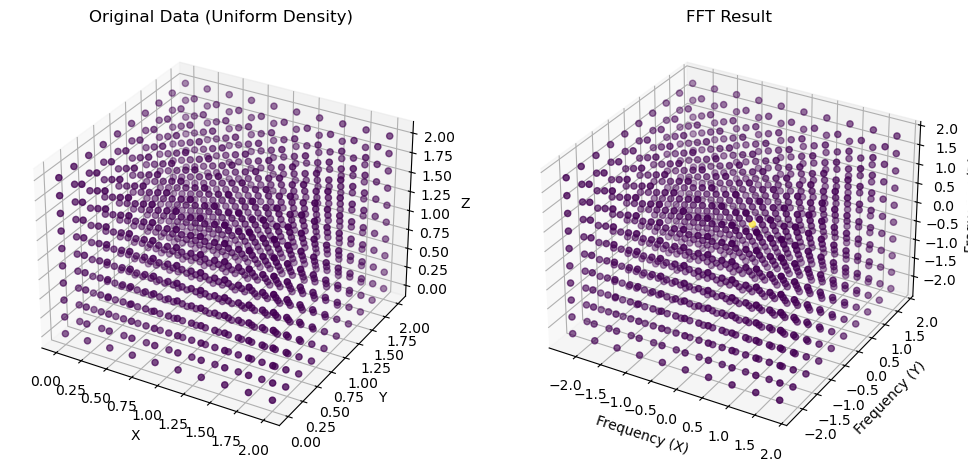

In [3]:
#FFT of the uniform density:
value = 1
uniform_density = np.full(x.shape,value)
#print(uniform_density)

# Perform FFT of uniform_density
fft_result = np.fft.fftn(uniform_density) 
print(fft_result)

# Shift the zero frequency component to the center of the spectrum
fft_result_shifted = np.fft.fftshift(fft_result)

# Calculate the frequencies corresponding to the FFT result
freq_x = np.fft.fftfreq(N, d=(X[1] - X[0])) #d specifies the sample spacing(i.e distance between adjacent points)
freq_y = np.fft.fftfreq(N, d=(Y[1] - Y[0]))
freq_z = np.fft.fftfreq(N, d=(Z[1] - Z[0]))
#print(freq_x)

#to view "a fette":
#image = np.random.rand(10, 10)
#plt.imshow(image, cmap='gray')  # cmap='gray' sets the colormap to grayscale
#plt.colorbar()  # Display a color bar to indicate pixel values

# Plot the original data and its FFT result
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, c=uniform_density.flatten(), cmap='viridis')
#c=uniform_density.flatten() means that the color of each point in the scatter plot will be determined by the corresponding value in the flattened uniform_density array.
ax1.set_title('Original Data (Uniform Density)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Create the grid for the FFT frequencies
freq_x_grid, freq_y_grid, freq_z_grid = np.meshgrid(freq_x, freq_y, freq_z, indexing='ij') #, indexing='ij'


ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(freq_x_grid, freq_y_grid, freq_z_grid, c=np.abs(fft_result), cmap='viridis')
ax2.set_title('FFT Result')
ax2.set_xlabel('Frequency (X)')
ax2.set_ylabel('Frequency (Y)')
ax2.set_zlabel('Frequency (Z)')

plt.show()

* compute power spectrum


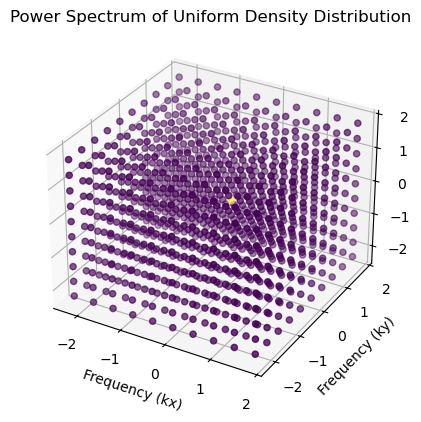

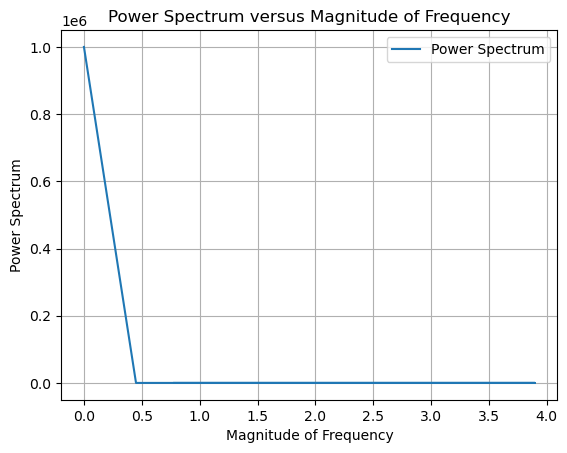

In [4]:
# Compute the power spectrum (it's the square of the absolute values of the Fourier coefficients.)
power_spectrum = np.abs(fft_result)**2
#print(power_spectrum)

#Compute the magnitude of k vector:
##I have 10 different frequency vectors --> 10 different magnitudes of frequency
abs_freq = []
for i in range(0,N):
    abs_freq.append(np.sqrt(freq_x[i]**2 + freq_y[i]**2 + freq_z[i]**2))
#print(abs_freq)

# Plot the power spectrum
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the power spectrum in 3D
ax.scatter(freq_x_grid, freq_y_grid, freq_z_grid, c=power_spectrum.flatten(), cmap='viridis') #flatten is used to convert a Nd array in a 1D array (for example: a matrix became a row of all numbers that there are in the matrix)
ax.set_title('Power Spectrum of Uniform Density Distribution')
ax.set_xlabel('Frequency (kx)')
ax.set_ylabel('Frequency (ky)')
ax.set_zlabel('Frequency (kz)')
plt.show()

'''
# Plot the power spectrum versus frequency along the k_x axis
plt.plot(freq_x, power_spectrum[:, 0, 0], label='Power Spectrum')
plt.xlabel('Frequency (k_x)')
plt.ylabel('Power Spectrum')
plt.title('Power Spectrum versus Frequency (k_x)')
plt.grid(True)
plt.legend()
plt.show()
'''
# Calculate the magnitude of the frequency vector ([:, np.newaxis, np.newaxis] is a slicing operation that adds two new axes to the array.)
freq_magnitude = np.sqrt(freq_x[:, np.newaxis, np.newaxis]**2 +
                         freq_y[np.newaxis, :, np.newaxis]**2 +
                         freq_z[np.newaxis, np.newaxis, :]**2)

# Flatten power spectrum and frequency magnitude for plotting
power_spectrum_flat = power_spectrum.flatten()
freq_magnitude_flat = freq_magnitude.flatten()

# Plot the power spectrum versus magnitude of frequency
plt.plot(freq_magnitude_flat, power_spectrum_flat, label='Power Spectrum')
plt.xlabel('Magnitude of Frequency')
plt.ylabel('Power Spectrum')
plt.title('Power Spectrum versus Magnitude of Frequency')
plt.grid(True)
plt.legend()
plt.show()

* Interpolation


In [7]:
#Nearest Grid Point (NGP) interpolation is a simple method where the value at a specific point is taken from the nearest grid point
def ngp_interpolation(grid, points):
    interpolated_values = []
    for point in points:
        # Find the nearest grid point
        nearest_point = np.round(point).astype(int) #round=approx points (i.e 2.5->3) (useful to find the nearest grid point)
        #astype serves to to change the data type (in this case in an integer)

        # Check if the nearest point lies within the grid bounds
        #.all() look at all the elements of the array
        #grid.shape take me the dimension of the grid (i.e if the grid is a cube 10x10x10, shape take me (10,10,10) )
        #tuple is similar to a list but different because tuple can contain more type(int, float, string, ..) )
        if (nearest_point >= 0).all() and (nearest_point < grid.shape).all():
            interpolated_values.append(grid[tuple(nearest_point)])
        else:
            interpolated_values.append(np.nan)  # Point lies outside the grid
    
    return np.array(interpolated_values)

# Example usage
# Define a sample grid (3D array)
grid = np.random.rand(10, 10, 10)  # Example grid of shape (10, 10, 10)
print(grid)

# Define sample points to interpolate
points = np.array([[2.3, 4.5, 6.7], [8.9, 1.2, 3.4], [11.1, 12.3, 14.5]])

# Perform NGP interpolation
interpolated_values = ngp_interpolation(grid, points)
print("Interpolated values:", interpolated_values)

#DOMANDE
#Implement a Power spectrum estimator in pyACC
#giusto quello che mi è venuto?
#in che senso ripetere l'esercizio sopra?


[[[6.77013460e-01 1.24192245e-01 1.56314495e-01 1.40630634e-01
   6.68937752e-01 7.44211846e-01 6.28199315e-01 5.26212068e-01
   6.93830383e-01 6.38740136e-03]
  [5.12257889e-01 3.31421311e-01 8.71759677e-01 5.93963596e-01
   8.14544034e-01 8.05275850e-01 2.77904708e-01 9.47319365e-01
   2.14339683e-01 3.39071159e-01]
  [3.64236254e-01 4.67499734e-01 8.79726998e-01 6.36669640e-01
   4.80861711e-01 2.88076819e-01 9.48246181e-01 9.97579823e-01
   7.48268767e-01 2.47169384e-01]
  [5.97902244e-01 5.27861596e-01 6.92574407e-01 5.10985555e-01
   4.53295461e-01 9.29955416e-01 5.97953180e-01 5.11694335e-03
   3.25980228e-02 9.36114745e-01]
  [2.04230483e-01 9.55207322e-01 7.38591757e-01 6.84358775e-01
   5.24335016e-01 8.62656932e-01 5.77780120e-01 8.07719617e-01
   7.38739290e-01 9.02264888e-01]
  [3.71040068e-01 5.23376575e-01 9.60667556e-01 1.80284823e-01
   7.52973269e-01 3.78180307e-02 5.99138897e-01 2.32490695e-01
   5.51614915e-01 9.24379137e-01]
  [3.50483177e-01 7.55739910e-01 4.93769